# Data Analysis Project: BIKE SHARING

- Nama: Citra Khairunnisa
- Email: citrak.khairunnisa@gmail.com
- ID Dicoding: cjtraa

## Bussiness Questions for Data Analysis
1. How is the bike rental data for the years 2011 and 2012 distributed among casual users, registered users, and the total number of users? Analyze whether there is growth or decline each year.
2. Which months had the highest number of renters in 2011?

In [252]:
#Imports the NumPy library, which is commonly used for numerical operations in Python.
import numpy as np
#Imports the Pandas library, which provides data structures and data analysis tools for working with structured data.
import pandas as pd
#Imports the Matplotlib library, a plotting library for creating static, interactive, and animated visualizations in Python.
import matplotlib.pyplot as plt
# Imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# DATA WRANGLING
Here, I will collect data (Gathering data), assess the data (Assessing data), and clean the data (Cleaning data) before using it in the data analysis process.
## Gathering Data 
Read the dataset (day.csv) and collect it in "bike_sharingaaaa_df".

In [253]:
bike_sharing_df = pd.read_csv("day.csv")
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data
It is a process aimed at identifying issues within the data and ensuring the quality of the data.
Now we're gonna checking for missing values, and getting an overview of the data types used in each column.

In [254]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Count the number of missing (NaN or null) values in each column of the bike_sharing_df DataFrame.

In [255]:
bike_sharing_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Count the number of duplicated rows in the bike_sharing_df DataFrame.

In [256]:
print("Jumlah duplikasi: ", bike_sharing_df.duplicated().sum())

Jumlah duplikasi:  0


provides summary statistics of the numerical columns in the bike_sharing_df DataFrame. It includes information such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.

In [257]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Cleaning Data
Changing the data type from object to datetime

In [258]:
datetime_columns = ["dteday"]

for column in datetime_columns :
    bike_sharing_df[column] = pd.to_datetime(bike_sharing_df[column])

In [259]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Inspect and identify the names of the columns in your dataset.

In [260]:
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [261]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


using the drop method of a pandas DataFrame to remove specific columns from the DataFrame bike_sharing_df

In [262]:
bike_sharing_df.drop(["workingday", "weathersit", "temp", "atemp", "hum", "windspeed"], axis=1, inplace=True)

In [263]:
bike_sharing_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,331,654,985
1,2,2011-01-02,1,0,1,0,0,131,670,801
2,3,2011-01-03,1,0,1,0,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,82,1518,1600


## Explanatory
Exploratory Data Analysis (EDA) is the stage of exploring cleaned data to gain insights and answer analytical questions.
Provide statistics such as count, unique, top, and frequency for categorical columns, as well as mean, standard deviation, minimum, and maximum for numerical columns. Additionally, for datetime columns, it will include statistical information considering them as numeric data.

In [264]:
bike_sharing_df.describe(include="all", datetime_is_numeric=True)

,instant,dteday,season,yr,mnth,holiday,weekday,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,686.622488,1560.256377,1937.211452


Grouping the bike-sharing data by the "yr" (year) column and then aggregate the sum of the "casual," "registered," and "cnt" columns for each year.

In [265]:
bike_sharing_df.groupby(by="yr").agg({
    "casual" : 'sum',
    "registered" : 'sum',
    "cnt":'sum'
})

,casual,registered,cnt
yr,,,
0,247252,995851,1243103
1,372765,1676811,2049576


Create three separate DataFrames (year_casual, year_registered, and year_total) by grouping the bike-sharing data by the "yr" (year) column and aggregating the sum of the "casual," "registered," and "cnt" columns for each year.

In [266]:
year_casual = bike_sharing_df.groupby('yr')['casual'].sum().reset_index()
year_casual
year_registered = bike_sharing_df.groupby('yr')['registered'].sum().reset_index()
year_registered
year_total = bike_sharing_df.groupby('yr')['cnt'].sum().reset_index()
year_total

,yr,cnt
0,0,1243103
1,1,2049576


Mapping numerical labels for years to corresponding string labels. It uses a dictionary (year_label) to perform the mapping. 

In [267]:
year_label = {
    0: '2011',
    1: '2012'
}

year_casual['yr']=year_casual['yr'].map(year_label)
year_registered['yr']=year_registered['yr'].map(year_label)
year_total['yr']=year_total['yr'].map(year_label)

Generates a 2x2 subplot containing bar plots to visualize the total casual rentals, total registered rentals, and total overall rentals for the years 2011 and 2012.

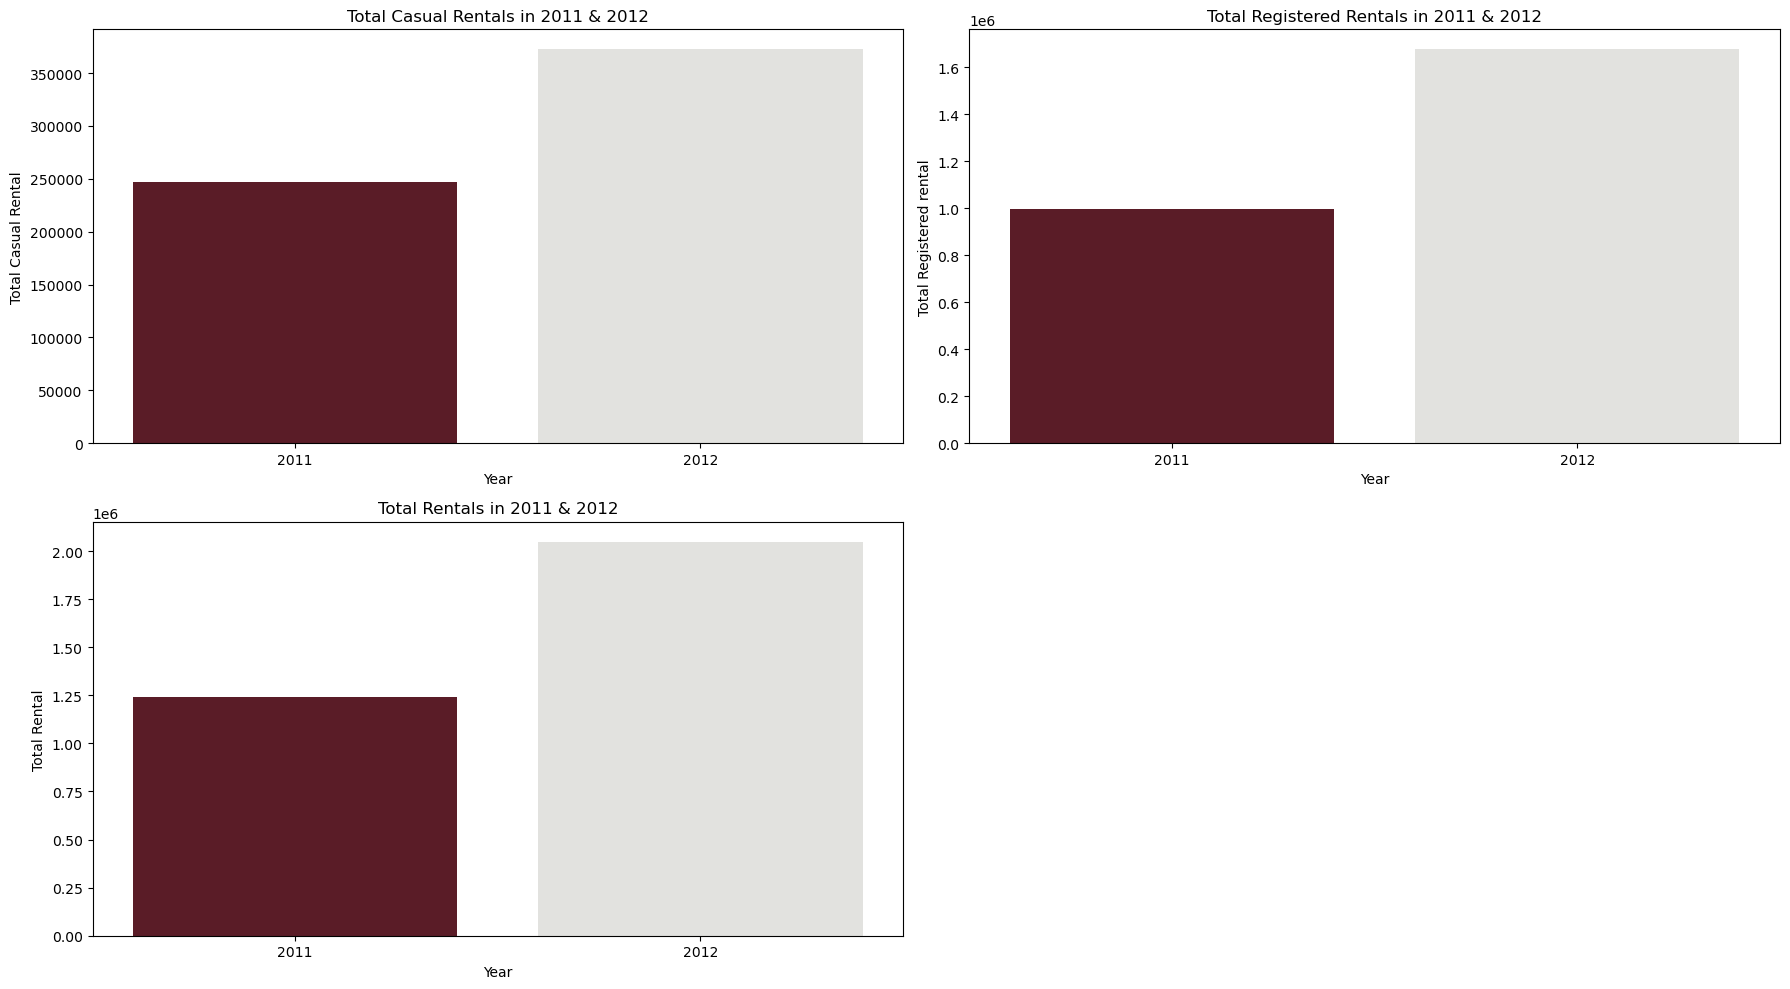

In [268]:
# Data visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
colours = ["#641220", "#e2e2df"]
# Plot for total casual rentals
sns.barplot(ax=axes[0, 0], x='yr', y='casual', data=year_casual, palette=colours)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Total Casual Rental')
axes[0, 0].set_title('Total Casual Rentals in 2011 & 2012')

# Plot total registered rentals
sns.barplot(ax=axes[0, 1], x='yr', y='registered', data=year_registered, palette=colours)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Registered rental')
axes[0, 1].set_title('Total Registered Rentals in 2011 & 2012')

# Remove unused subplot
fig.delaxes(axes[1, 1])

# Plot for total overall rentals
sns.barplot(ax=axes[1, 0], x='yr', y='cnt', data=year_total, palette=colours)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Rental')
axes[1, 0].set_title('Total Rentals in 2011 & 2012')

plt.tight_layout()
plt.show()


Creates a subset of the DataFrame bike_sharing_df named year_filter_2011, containing data only for the year 2011. This is achieved by filtering rows where the 'dteday' column falls within the date range from January 1, 2011, to December 31, 2011.

In [269]:
year_filter_2011 = bike_sharing_df[(bike_sharing_df['dteday'] >= "2011-01-01") & (bike_sharing_df['dteday'] <= "2011-12-31")]

Aggregates the total count of rentals ('cnt') for each month in the year 2011, converts the month numbers to their corresponding full names, and presents the results in the month_sum DataFrame. 

In [270]:
month_sum = year_filter_2011.groupby("mnth")['cnt'].sum().reset_index()
month_sum['mnth'] = pd.to_datetime(month_sum['mnth'], format='%m').dt.strftime('%B')

# Rename the column
month_sum.rename(columns={"cnt": "total"}, inplace=True)

month_sum.tail()


,mnth,total
7,August,136691
8,September,127418
9,October,123511
10,November,102167
11,December,87323


Show the month_sum

In [271]:
month_sum

,mnth,total
0,January,38189
1,February,48215
2,March,64045
3,April,94870
4,May,135821
5,June,143512
6,July,141341
7,August,136691
8,September,127418
9,October,123511


Sorting the month_sum DataFrame based on the "total" column in descending order (from highest to lowest) and then selecting the top five rows. 

In [272]:
temp_sorted = month_sum.sort_values(by="total",ascending=False)

#assigning the data
top_five = temp_sorted.head(5)
top_five.head()

,mnth,total
5,June,143512
6,July,141341
7,August,136691
4,May,135821
8,September,127418


Use the Seaborn library to create a bar plot to visualize the distribution of total bike rentals for the top five months in 2011. The resulting bar plot visualizes the total bike rentals for the top five months in 2011, with each bar representing a month and the height of the bar indicating the total rental count. The specified color palette is applied to differentiate the bars.

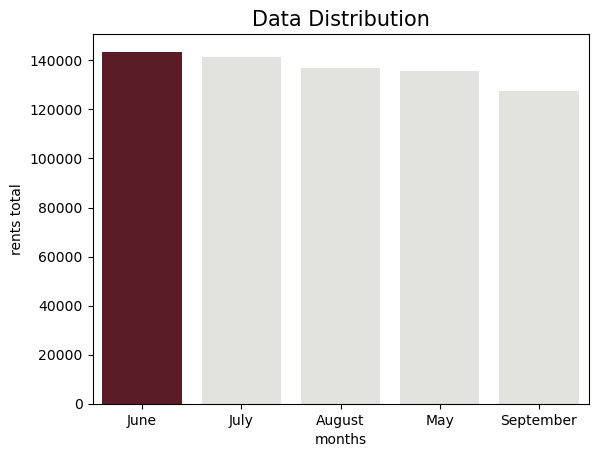

In [273]:
colours = ["#641220", "#e2e2df", "#e2e2df", "#e2e2df", "#e2e2df"]
sns.barplot(
    x="mnth",
    y="total",
    data=top_five,
    palette = colours
)
plt.title("Data Distribution", loc="center", fontsize=15)
plt.ylabel("rents total")
plt.xlabel("months")
plt.tick_params(axis='x', labelsize=10)
plt.show()


## CONCLUSION
1. Analysis: The analysis of bike rental data for the years 2011 and 2012 reveals a positive trend in user engagement, indicating growth in the bike-sharing system. In 2011, casual rentals accounted for 247,252 rentals, and this figure experienced a significant increase to 372,765 rentals in 2012. Similarly, registered rentals showed growth, rising from 995,851 in 2011 to 1,676,811 in 2012. The overall number of rentals, combining both casual and registered users, demonstrated substantial growth, increasing from 1,243,103 in 2011 to 2,049,576 in 2012. This upward trajectory suggests a growing popularity and adoption of the bike-sharing system over the two-year period. The positive trend in both casual and registered rentals collectively contributes to the overall increase in the total number of bike rentals, highlighting the success and expanding utilization of the bike-sharing service.

2. Analysis: In 2011, the bike rental data reveals fluctuations in the number of renters across different months. Among these, June stood out as the month with the highest number of rentals, reaching a total of 143,512. Following closely, July and August recorded 141,341 and 136,691 rentals, respectively. May and September also experienced substantial rental activity, with 135,821 and 127,418 rentals, respectively. These figures highlight the seasonality of bike rentals, with the summer months witnessing a peak in user engagement, likely influenced by favorable weather conditions and outdoor activities.